In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
from sklearn import neighbors, tree, metrics

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [4]:
df['zone 1 consume more'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].mean()
df['predict'] = False
(df.predict == df['zone 1 consume more']).mean()

0.5040254884004884

In [5]:
low_temp_df = df[df.Temperature <= df.Temperature.mean()]
high_temp_df = df[df.Temperature > df.Temperature.mean()]

In [6]:
high_temp_df['predict'] = True
(high_temp_df.predict == high_temp_df['zone 1 consume more']).mean()

C:\Users\david\AppData\Local\Temp\ipykernel_13872\196591065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_temp_df['predict'] = True


0.6337516259851557

C:\Users\david\AppData\Local\Temp\ipykernel_13872\3562978422.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (class1_count / n) * (class2_count / n)


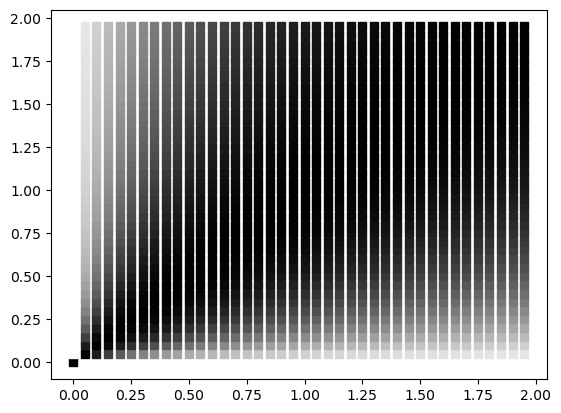

In [7]:
def gini(class1_count, class2_count):
    n = class1_count + class2_count
    return 2 * (class1_count / n) * (class2_count / n)

points_range = 2
step = .05

plt.scatter([], [])
for x in np.arange(0, points_range, step):
    for y in np.arange(0, points_range, step=step):
        plt.plot(x, y, marker='s', ls='none', color = np.array([1, 1, 1]) - np.array([1, 1, 1]) * gini(x, y) * 2)

plt.show()
        

In [8]:
count_true = (df['zone 1 consume more'] == True).sum()
count_false = (df['zone 1 consume more'] == False).sum()
gini(count_false, count_true)

0.4999675908862751

In [9]:
predict_true = (df['predict'] == True).sum()
predict_false = (df['predict'] == False).sum()
# gini(predict_true, predict_false)

C:\Users\david\AppData\Local\Temp\ipykernel_13872\3562978422.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  return 2 * (class1_count / n) * (class2_count / n)


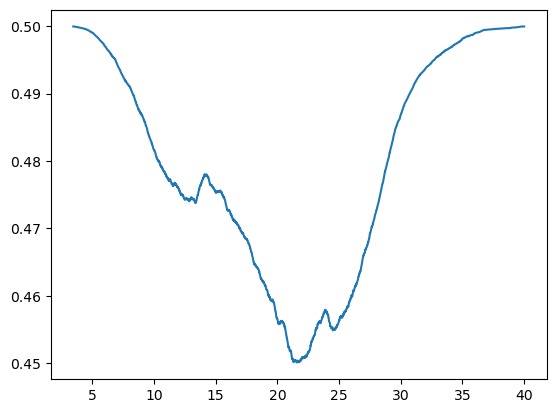

In [10]:
cutoffs = sorted(df.Temperature.unique())
df['truth'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].mean()

ginis = []

for cutoff in cutoffs:
    more = df[df.Temperature >= cutoff]
    less = df[df.Temperature < cutoff]
    
    more_gini = gini((more.truth == True).sum(), (more.truth == False).sum())
    less_gini = gini((less.truth == True).sum(), (less.truth == False).sum())
    
    avg_gini = ((more_gini * len(more)) + (less_gini * len(less))) / len(df)
    ginis.append(avg_gini)

plt.plot(cutoffs, ginis)

In [11]:
np.argmin([3, 2, 3])

1

## Use ScikitLearn

In [12]:
df['zone 1 consume more'].value_counts()

False    26419
True     25997
Name: zone 1 consume more, dtype: int64

[Text(0.5, 0.75, 'Temperature <= 21.785\ngini = 0.498\nsamples = 45000\nvalue = [21085, 23915]'),
 Text(0.25, 0.25, 'gini = 0.487\nsamples = 28949\nvalue = [16795, 12154]'),
 Text(0.75, 0.25, 'gini = 0.392\nsamples = 16051\nvalue = [4290, 11761]')]

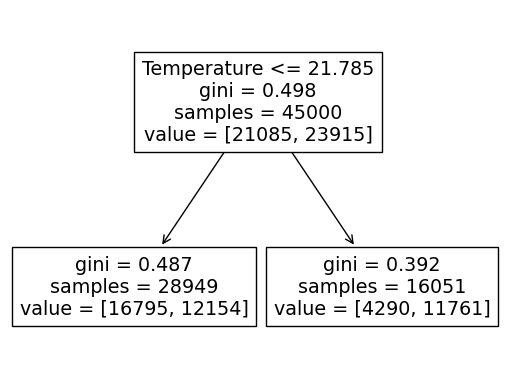

In [13]:
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

model = tree.DecisionTreeClassifier(min_samples_leaf=15000)
features = ['Temperature']
label = ['zone 1 consume more']

train_X = train_df[features]
train_y = train_df[label]

model.fit(train_X, train_y)

tree.plot_tree(model, feature_names=features)

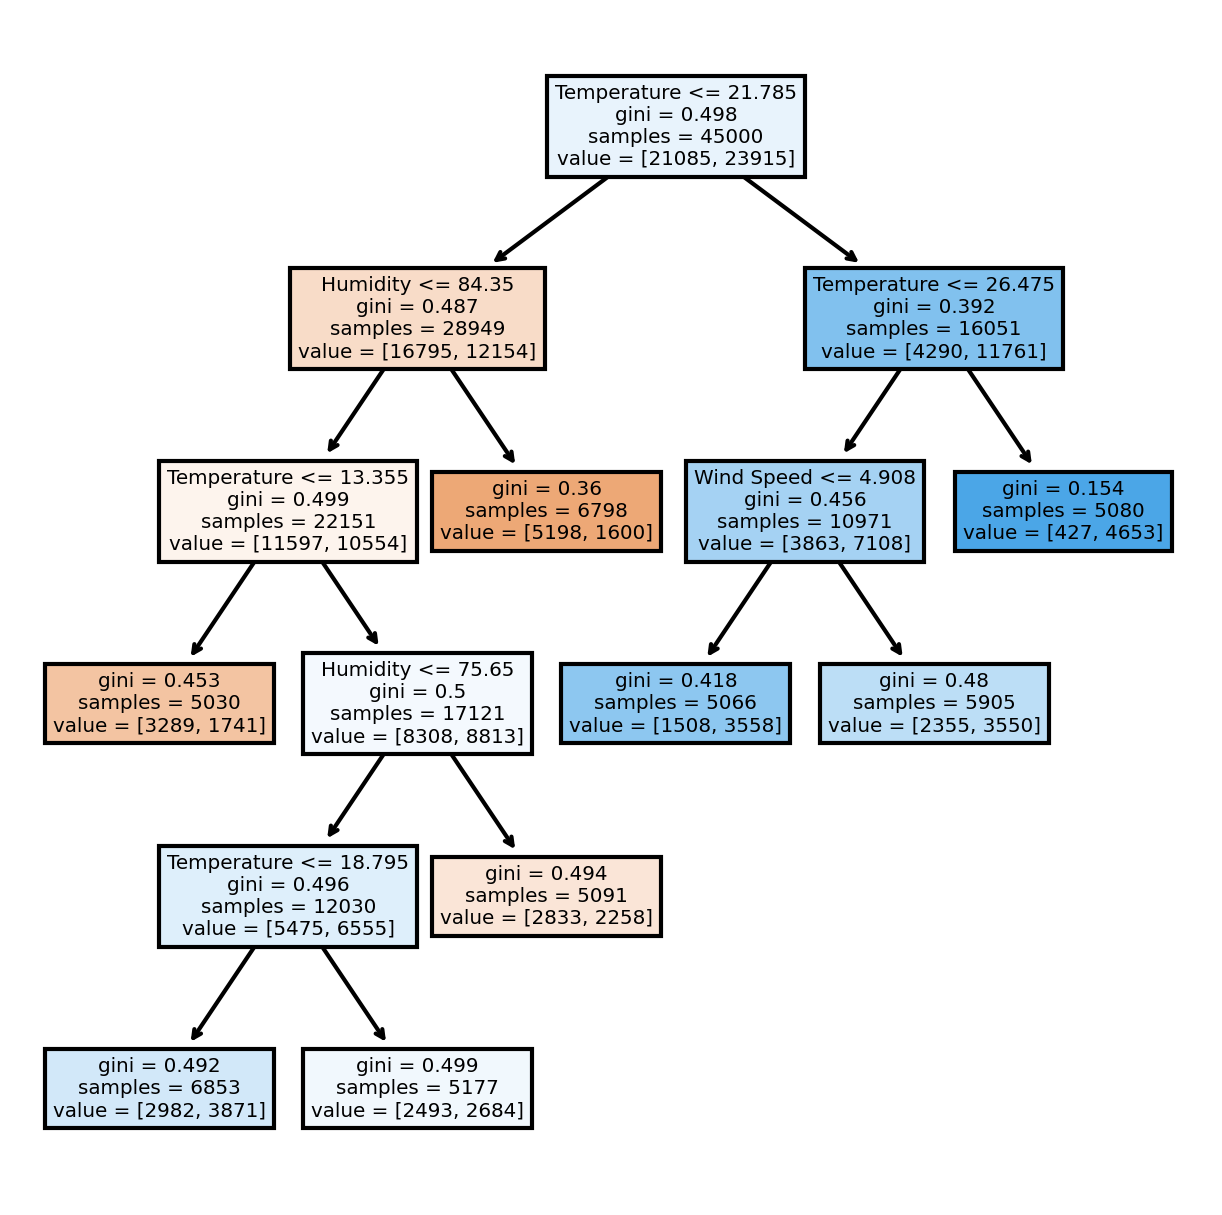

In [28]:
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

model = tree.DecisionTreeClassifier(min_samples_leaf=5000)
features = ['Temperature', 'Humidity', 'Wind Speed']
label = ['zone 1 consume more']

train_X = train_df[features]
train_y = train_df[label]

model.fit(train_X, train_y)

plt.figure(dpi=300, figsize=(5, 5))
_ = tree.plot_tree(model, feature_names=features, filled=True)

score:  0.13701404612045964  | ( min leaf =  3000 ).


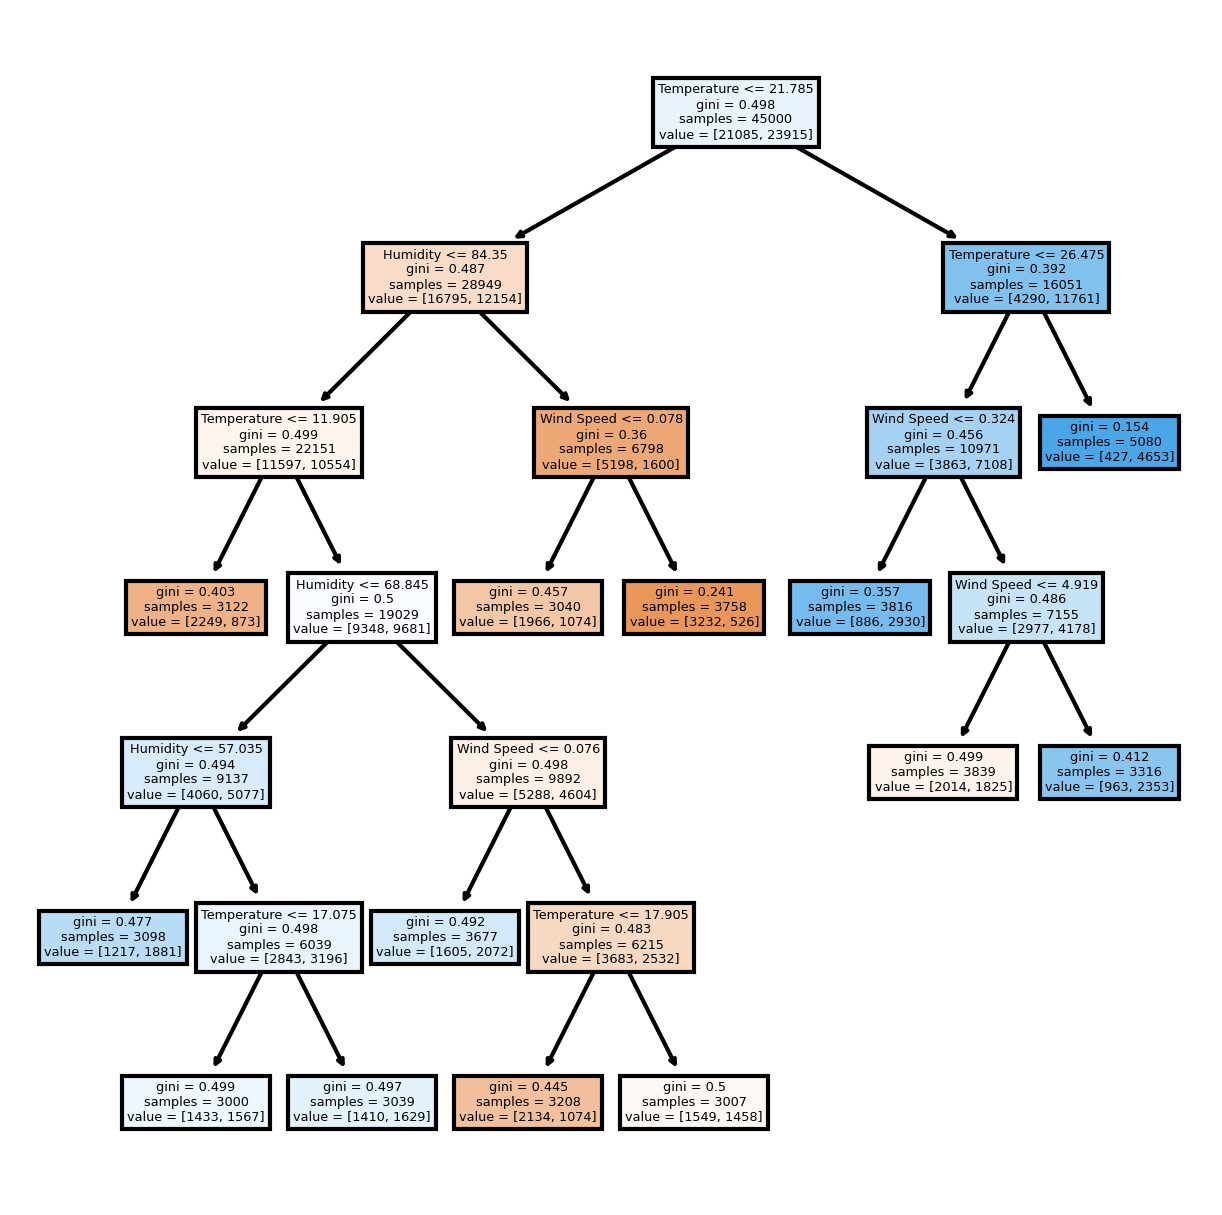

In [37]:
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

min_leaf = 3000

model = tree.DecisionTreeClassifier(min_samples_leaf=min_leaf)
features = ['Temperature', 'Humidity', 'Wind Speed']
label = ['zone 1 consume more']

train_X = train_df[features]
train_y = train_df[label]
test_X = test_df[features]
test_y = test_df[label]

model.fit(train_X, train_y)

preds = model.predict(test_X)
kappa = metrics.cohen_kappa_score(preds, test_y)

print('score: ', kappa, ' | ( min leaf = ', min_leaf, ').')

plt.figure(dpi=300, figsize=(5, 5))
_ = tree.plot_tree(model, feature_names=features, filled=True)

    

## Plot the grid spaces

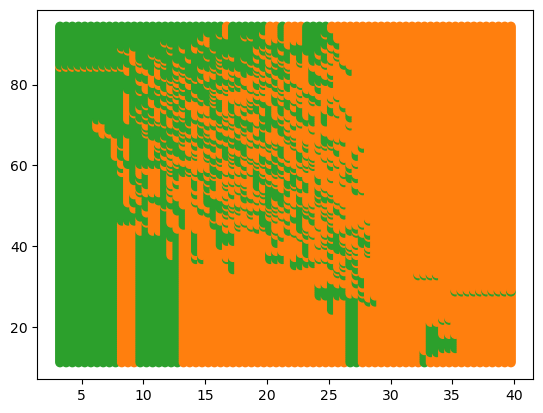

In [70]:
# np.arange(0, 100, .5)

train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

min_leaf = 1

model = tree.DecisionTreeClassifier(min_samples_leaf=min_leaf)
features = ['Temperature', 'Humidity']
label = ['zone 1 consume more']

train_X = train_df[features]
train_y = train_df[label]
test_X = test_df[features]
test_y = test_df[label]

model.fit(train_X, train_y)

preds = model.predict(test_X)
kappa = metrics.cohen_kappa_score(preds, test_y)

# print('score: ', kappa, ' | ( min leaf = ', min_leaf, ').')

# plt.figure(dpi=300, figsize=(5, 5))
# _ = tree.plot_tree(model, feature_names=features, filled=True)

# PLOT

# plt.scatter([], [])

temps = []
hums = []
for temp in np.arange(df.Temperature.min(), df.Temperature.max(), .5):
    for hum in np.arange(df.Humidity.min(), df.Humidity.max(), .5):
        temps.append(temp)
        hums.append(hum)

grid_df = pd.DataFrame({
    'Temperature': temps,
    'Humidity': hums
})

sss = model.predict(grid_df)

colors = ['C1' if p else 'C2' for p in sss]
plt.scatter(grid_df.Temperature, grid_df.Humidity, c=colors)